##Practical 3: Comparison between Linear , polynomial ,Lasso and Ridge Regression.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

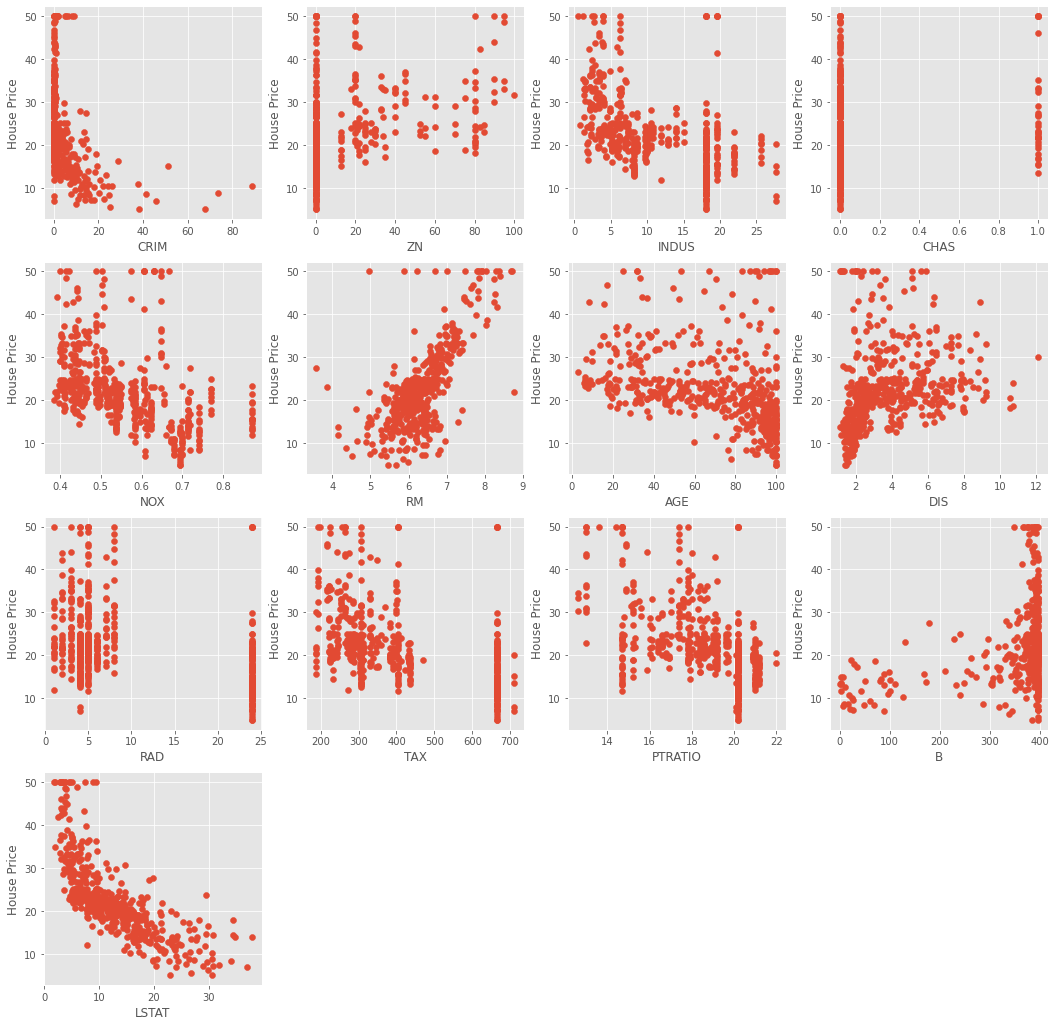

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index + 1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 12)
    ax.set_xlabel(feature_name, size = 12)

plt.show()

In [ ]:

boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
test_size = 0.25)
print("Train data shape of X = %s amd Y=%s : "%(
x_train.shape, y_train.shape))

print("Test data shape of X =% s and Y=% s : "%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) amd Y=(379,) : 
Test data shape of X =(127, 13) and Y=(127,) : 


In [ ]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()

lreg_coefficient["Columns"] = x_train. columns

lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  28.632117229578697
    Columns  Coefficient Estimate
0      CRIM             -0.115593
1        ZN              0.044584
2     INDUS              0.027613
3      CHAS              3.517594
4       NOX            -19.830174
5        RM              3.829967
6       AGE              0.018312
7       DIS             -1.482626
8       RAD              0.300362
9       TAX             -0.011460
10  PTRATIO             -0.813066
11        B              0.008557
12    LSTAT             -0.593732


In [ ]:
 # import ridge regression from sklearn library

from sklearn.linear_model import Ridge

# Train the model

ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error

mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them

ridge_coefficient = pd.DataFrame()

ridge_coefficient["Columns"]= x_train.columns

ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

28.361460895131934
    Columns  Coefficient Estimate
0      CRIM             -0.112092
1        ZN              0.046448
2     INDUS             -0.007806
3      CHAS              3.208107
4       NOX            -10.709704
5        RM              3.927646
6       AGE              0.010625
7       DIS             -1.344239
8       RAD              0.280735
9       TAX             -0.012256
10  PTRATIO             -0.709508
11        B              0.008941
12    LSTAT             -0.603339


###Lasso Regression

In [ ]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error

mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()

lasso_coeff["Columns"] = x_train.columns

lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 33.07230654040617
    Columns  Coefficient Estimate
0      CRIM             -0.068039
1        ZN              0.046446
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.939042
6       AGE              0.034394
7       DIS             -0.668958
8       RAD              0.232769
9       TAX             -0.014197
10  PTRATIO             -0.546803
11        B              0.006845
12    LSTAT             -0.816199


###Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(x_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)

y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))

In [ ]:
mean_squared_error = np.mean((y_test_predicted - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

poly_coeff = pd.DataFrame()

poly_coeff["“Columns"] = x_train. columns

poly_coeff[ 'Coefficient Estimate'] = pd.Series(poly_model.coef_)

print(poly_coeff)
plt.show()

Mean squared error on test set 16.39909286164332
   “Columns  Coefficient Estimate
0      CRIM         -1.562277e+08
1        ZN         -6.174218e+00
2     INDUS          2.585049e-01
3      CHAS         -3.163302e+00
4       NOX          2.320946e+01
5        RM         -3.492899e+01
6       AGE          7.747733e+00
7       DIS          1.104304e+00
8       RAD         -1.133985e+01
9       TAX          2.431415e+00
10  PTRATIO          2.679613e-02
11        B          2.551897e+00
12    LSTAT          8.677765e-02
